In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
def func_sigmoid(x):
    return 1/(1+np.exp(-1*x))

def func_tanh(x):
    return (np.exp(x)-np.exp(-1*x))/(np.exp(x)+np.exp(-1*x))

# def func_ReLU(x):
#     return max(0,x)

# def func_PReLU(x, a):
#     return max(0,x)+min(0,x*a)

In [ ]:
def add_padding(image, padding):
  w, h, c = image.shape
  output = np.empty([w+2*padding, h+2*padding, c])
  for i in range(c):
    temp = image[:, :, i]
    for j in range(padding):
      temp = np.insert(temp, 0, [0], axis=1)
      temp = np.insert(temp, len(temp[0]), [0], axis=1)
      temp = np.insert(temp, [0], [0], axis=0)
      temp = np.insert(temp, [len(temp)], [0], axis=0)
    output[:, :, i] = temp
  return output


QUESTION - 1




In [ ]:
def convolution_function(input_image, filter_kernel, stride, padding, non_linear_function):
  image = input_image
  (width, height, channels) = input_image.shape
  filter_kernel = np.flip(filter_kernel, 0)
  filter_kernel = np.flip(filter_kernel, 1)
  k1, k2, channels = filter_kernel.shape
  (stride1, stride2) = (stride[0], stride[1])
  output_dim1, output_dim2 = int((width - k1 + 2*padding) / stride1) + 1, int((height - k2 + 2*padding) / stride2) + 1
  # print(output_dim1, output_dim2)
  output = np.empty([output_dim1, output_dim2, channels])
  # print(image.shape)
  image = add_padding(image, padding)
  # print(image.shape)
  for c in range(channels):
    for i in range(0, output_dim1):
      for j in range(0, output_dim2):
        a = i * stride1
        b = j * stride2
        output[i][j][c] = (filter_kernel[:, :, c]*image[a:a + k1, b:b + k2, c]).sum()
  
  new_output = np.sum(output, axis=2)
  if non_linear_function == "sigmoid":
    for i in range(output_dim1):
      for j in range(output_dim2):
        new_output[i][j] = func_sigmoid(new_output[i][j])
  elif non_linear_function == "tanh":
    for i in range(output_dim1):
      for j in range(output_dim2):
        new_output[i][j] = func_tanh(new_output[i][j])
  elif non_linear_function == "ReLU":
    for i in range(output_dim1):
      for j in range(output_dim2):
        new_output[i][j] = max(0, new_output[i][j])
    # new_output = func_ReLU(new_output)
  return new_output
  
      

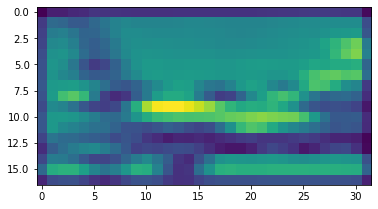

In [ ]:
# img = np.asarray(Image.open("orst.png"))
newimg = plt.imread("airplane3.png")
plt.imshow(newimg)
# print(img.shape)
ker = np.random.rand(2, 3, 3)
stride = np.array([2, 1])
padding = 1
outimg = convolution_function(newimg, ker, stride, padding, "ReLU")
plt.imshow(outimg)

QUESTION - 2

In [ ]:
def pooling_function(conv_func_output, pooling_type, filter_size, stride):
  width, height = conv_func_output.shape
  stride1, stride2 = stride[0], stride[1]
  k1, k2 = filter_size[0], filter_size[1]
  output_dim1, output_dim2 = int((width - k1) / stride1) + 1, int((height - k2) / stride2) + 1
  output = np.empty([output_dim1, output_dim2])
  for i in range(0, output_dim1):
      for j in range(0, output_dim2):
        a = i * stride1
        b = j * stride2
        if pooling_type == "max":
          output[i][j] = (conv_func_output[a:a + k1, b:b + k2]).max()
        elif pooling_type == "avg":
          output[i][j] = np.mean((conv_func_output[a:a + k1, b:b + k2]))
  return output

  

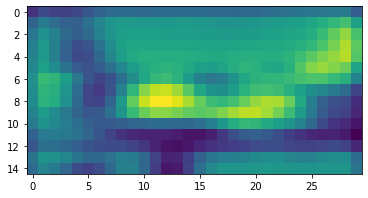

In [ ]:
filt = np.array([3, 3])
stride = np.array([1, 1])
plt.imshow(pooling_function(outimg, "avg", filt, stride))

QUESTION - 3

In [ ]:
def conv_layer_func(image, number_of_kernels, kernel_dim, stride, padding, non_linear_function):
  width, height, channels = image.shape
  k1, k2, k3 = kernel_dim[0], kernel_dim[1], kernel_dim[2]
  stride1, stride2 = stride[0], stride[1]
  output_dim1, output_dim2 = int((width - k1 + 2*padding) / stride1) + 1, int((height - k2 + 2*padding) / stride2) + 1
  output = np.empty([output_dim1, output_dim2, number_of_kernels])
  for i in range(number_of_kernels):
    kernel = np.random.rand(k1, k2, k3)
    # print("hii")
    output[:, :, i] = convolution_function(image, kernel, stride, padding, non_linear_function)

  return output

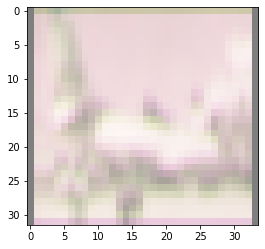

In [ ]:
padding = 1
kern = np.array([3, 1, 3])
stride = np.array([1, 1])
plt.imshow(conv_layer_func(newimg, 3, kern, stride, padding, "sigmoid"))

QUESTION - 4

In [ ]:
def pooling_layer_func(image, pooling_type, filter_size, stride):
  width, height, depth = image.shape
  if pooling_type == "GAP":
    for i in range(depth):
      output = np.empty([depth])
      output[i] = np.mean(image[:, :, i])
      return output
  
  stride1, stride2 = stride[0], stride[1]
  k1, k2 = filter_size[0], filter_size[1]
  output_dim1, output_dim2 = int((width - k1) / stride1) + 1, int((height - k2) / stride2) + 1
  output = np.empty([output_dim1, output_dim2, depth])
  
  for i in range(depth):
    output[:, :, i] = pooling_function(image[:, :, i], pooling_type, filter_size, stride)
    #print(pooling_function(image[:, :, i], pooling_type, filter_size, stride))
  
  return output

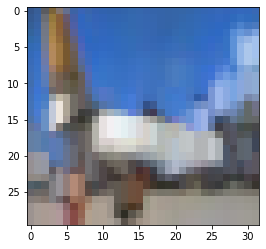

In [ ]:
a = (pooling_layer_func(newimg, "max", kern, stride))
plt.imshow(a)

QUESTION - 5

In [ ]:
def flattening(image, output_len):
  image = image.reshape(-1)
  weights = np.random.rand(output_len, len(image))
  return weights@image

In [ ]:
flattening(newimg, 10)

array([672.29456639, 682.89157189, 680.93187521, 682.74398256,
       687.3814994 , 677.36736269, 682.76705922, 693.44116357,
       683.71916256, 683.99379396])

QUESTION - 6

In [ ]:
def MLP(input, number_of_hid_layers, size_of_layers, non_linear_function, output_size, used_softmax):
  
  weights = np.random.rand(number_of_hid_layers-1, size_of_layers, size_of_layers)
  input_weights = np.random.rand(size_of_layers, len(input))
  b = np.random.rand(size_of_layers)
  last_weights = np.random.rand(output_size, size_of_layers)
  output = input_weights@input + b
  if non_linear_function == "sigmoid":
    for i in range(len(output)):
      output[i] = func_sigmoid(output[i])
  elif non_linear_function == "tanh":
    for i in range(len(output)):
      output[i] = func_tanh(output[i])
  elif non_linear_function == "ReLU":
    for i in range(len(output)):
        output[i] = max(0, output[i])
    # new_output = func_ReLU(new_output)
  # print(output)
  # print(output)
  for i in range(number_of_hid_layers-1):
    b = np.random.rand(size_of_layers)
    output = weights[i]@output + b
    if non_linear_function == "sigmoid":
      for i in range(len(output)):
        output[i] = func_sigmoid(output[i])
    elif non_linear_function == "tanh":
      for i in range(len(output)):
        output[i] = func_tanh(output[i])
    elif non_linear_function == "ReLU":
      for i in range(len(output)):
          output[i] = max(0, output[i])
    # new_output = func_ReLU(new_output)
    # print(output)
  b = np.random.rand(output_size)
  output = last_weights@output + b
  
  if non_linear_function == "sigmoid":
    for i in range(len(output)):
      output[i] = func_sigmoid(output[i])
  elif non_linear_function == "tanh":
    for i in range(len(output)):
      output[i] = func_tanh(output[i])
  elif non_linear_function == "ReLU":
    for i in range(len(output)):
        output[i] = max(0, output[i])
    # new_output = func_ReLU(new_output)
  # print(output)
  if used_softmax:
    output = np.exp(output) / np.exp(output).sum()
    return output
  else:
    return output

QUESTION - 7

In [ ]:
newimg = plt.imread("airplane3.png")
def FeedForward(image):
  output = conv_layer_func(image, 16, np.array([3, 3, image.shape[2]]), np.array([1, 1]), 0, "sigmoid")
  output = pooling_layer_func(output, "max", np.array([2, 2]), np.array([2, 2]))
  output = conv_layer_func(output, 8, np.array([3, 3, image.shape[2]]), np.array([1, 1]), 0, "sigmoid")
  output = pooling_layer_func(output, "max", np.array([2, 2]), np.array([2, 2]))
  output = pooling_layer_func(output, "GAP", np.array([2, 2]), np.array([2, 2]))
  output = MLP(output, 1, len(output), "sigmoid", 10, True)
  return output


In [ ]:
FeedForward(newimg)

array([0.09974416, 0.10081779, 0.10031109, 0.10095384, 0.10129185,
       0.10142658, 0.10150875, 0.10024033, 0.09305467, 0.10065094])

QUESTION - 8A

In [ ]:
images = ["airplane3.png", "automobile3.png", "bird7.png", "cat2.png", "deer2.png", "dog4.png", "frog4.png", "horse2.png", "ship7.png", "truck2.png"]
for i in images:
  temp_image = plt.imread(i)
  print(FeedForward(temp_image))

[0.10050045 0.10064396 0.09748983 0.10050398 0.10074904 0.10080368
 0.10022866 0.10083657 0.09973977 0.09850405]
[0.09951962 0.10006327 0.1004706  0.10051971 0.10078937 0.09913254
 0.09883853 0.10006877 0.09990465 0.10069295]
[0.09932627 0.10073768 0.09979952 0.10033578 0.09953323 0.10043636
 0.09928139 0.09996104 0.10020257 0.10038615]
[0.10103839 0.09992483 0.10018884 0.09433527 0.10116585 0.10159985
 0.10108636 0.09870861 0.10091659 0.10103542]
[0.10006004 0.10013519 0.09899756 0.09990765 0.1001107  0.09955393
 0.10037495 0.10040335 0.10065232 0.09980431]
[0.10055561 0.10031121 0.09819166 0.10007307 0.10073282 0.10047884
 0.09982888 0.10072486 0.10045993 0.09864311]
[0.1005526  0.10075483 0.10022911 0.1010474  0.10010628 0.098426
 0.09907198 0.10010247 0.09967053 0.10003881]
[0.10093007 0.10054022 0.10088251 0.10111943 0.09909429 0.09937042
 0.0995232  0.1011244  0.0995344  0.09788104]
[0.10052215 0.10015873 0.10041922 0.10045543 0.10037871 0.10028629
 0.09999875 0.10040556 0.100325

I don't see any trend in the output vectors that I obtained. 

QUESTION - 8B

In [ ]:
images = ["airplane3.png", "airplane4.png", "airplane10.png", "automobile1.png", "automobile10.png", "automobile3.png", "bird1.png", "bird2.png", "bird7.png", "cat2.png", "cat3.png", "cat4.png", "deer1.png", "deer2.png", "deer8.png", "dog3.png", "dog4.png", "dog10.png", "frog1.png", "frog2.png", "frog4.png", "horse2.png", "horse6.png", "horse7.png", "ship2.png", "ship5.png", "ship7.png", "truck1.png", "truck2.png", "truck5.png"]
result = np.empty([30, 10])

for i in range(len(images)):
  temp = plt.imread(images[i])
  output = conv_layer_func(temp, 16, np.array([3, 3, temp.shape[2]]), np.array([1, 1]), 0, "sigmoid")
  output = pooling_layer_func(output, "max", np.array([2, 2]), np.array([2, 2]))
  output = conv_layer_func(output, 8, np.array([3, 3, temp.shape[2]]), np.array([1, 1]), 0, "sigmoid")
  output = pooling_layer_func(output, "max", np.array([2, 2]), np.array([2, 2]))
  output = flattening(output, 10)
  result[i] = output



print(result)



[[140.67540221 152.33602253 162.46406982 144.07012761 148.54678437
  139.99595675 147.23936737 150.33893005 145.1558789  148.5608854 ]
 [141.75987763 144.36009576 145.43559303 143.94290811 143.67772435
  142.65437714 148.02317185 141.060743   148.168277   150.61938516]
 [152.45057937 151.01141177 144.14033314 138.54348195 149.03945832
  141.33833533 139.34528473 147.91101008 147.87577149 139.34563912]
 [137.34636135 138.18975399 147.8437739  146.96013741 144.55674102
  138.92333238 145.30785355 138.68048984 144.03904292 144.61481241]
 [143.58528337 145.86240927 140.09541639 147.77240262 146.01369583
  143.87770841 139.99145053 147.72304651 147.24295231 134.89391855]
 [136.81391835 147.62201399 136.12243061 144.59055999 155.37027248
  145.74608657 149.87911685 140.02632578 149.94700809 148.7146212 ]
 [143.98136657 139.03255919 147.99847843 143.68081224 143.50578671
  148.65200994 139.63752663 149.0119127  144.40681014 139.96721212]
 [135.93545491 146.78534452 138.3668971  143.19113555 1

In [ ]:
from sklearn.decomposition import PCA

reduced_result = PCA(n_components=2)
reduced_result.fit(result)
result = reduced_result.transform(result)

print(result)

[[ -9.44341724  14.77633502]
 [  3.15656371   3.2920928 ]
 [ -9.75623827  -1.94784562]
 [ -0.36490531   1.45036966]
 [ -5.5017974   -3.42979637]
 [ 11.76940428   3.2536492 ]
 [ -7.77965445   0.47421083]
 [ 12.02353685  -2.9919848 ]
 [  0.09772143   0.69866027]
 [ -3.98951228   3.42645379]
 [  9.33128042 -10.99647393]
 [ 16.08985104   5.82507491]
 [  5.69527787   1.04888794]
 [  2.52082798   0.2722207 ]
 [  5.09428475 -10.70353568]
 [ -4.18568489   5.81954466]
 [  1.44484636  -9.38812987]
 [  6.54919701  -1.8804783 ]
 [  0.5395509   17.42138478]
 [ -8.04611487  -0.60119327]
 [ -3.88844633 -10.99147126]
 [ -8.67994834   4.0108562 ]
 [ -6.18869209   1.27584625]
 [  8.65136145   8.34119474]
 [ -8.79096592  -1.26835504]
 [  8.82075868   1.85705447]
 [ -7.5686983   -2.62124327]
 [  2.028584     0.15979547]
 [ -4.91981609  -7.36002684]
 [ -4.70915494  -9.22309742]]


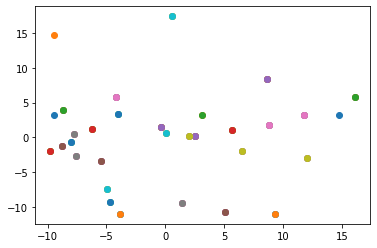

In [ ]:
# result = result.T
plt.scatter(result[0], result[1])
for i in range(len(result)):
  plt.scatter(result[i:i+3, 0], result[i:i+3, 1])

No, the vectors do not show any discriminability because of the random initialisation and more importantly because there was no training, where we are supposed to get a single feature fired up more than the other 9 features, we get all the values in each vector almost equal to each other. 